In [2]:
from   sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y=mnist["data"],mnist["target"]
# Convert to numpy arrays and ensure proper data types
X = X.values if hasattr(X, 'values') else X
Y = y.values if hasattr(y, 'values') else y
Y = y.astype(int)  # Convert target to integers

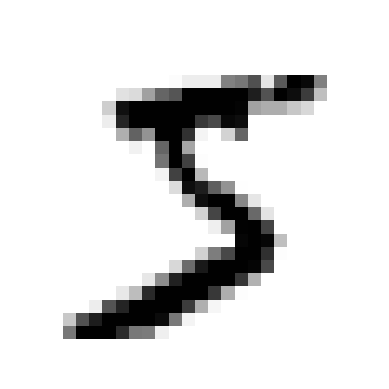

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit=X[0]  # Use numpy array indexing
some_digit_image=some_digit.reshape(28,28)

plt.imshow(some_digit_image ,cmap="binary")
plt.axis("off")
plt.show()

In [5]:
value=Y[0]  # Use numpy array indexing

In [6]:
X_train,X_test ,y_train ,y_test=X[:60000],X[60000:],Y[:60000],Y[60000:]

In [7]:
from sklearn.linear_model import SGDClassifier 

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

sgd_clf =SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)



SGDClassifier(random_state=42)

In [8]:
sgd_clf.predict([some_digit])

array([ True])

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5 ,cv=3 ,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.model_selection import cross_val_predict

y_train_pridict =cross_val_predict(sgd_clf,X_train , y_train_5 , cv=3)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pridict)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [12]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(y_train_5,y_train_pridict))
print(recall_score(y_train_5,y_train_pridict))


0.8370879772350012
0.6511713705958311


In [13]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pridict)

0.7325171197343847

In [14]:
y_scores = sgd_clf.decision_function([some_digit])

In [15]:
y_scores

array([2164.22030239])

In [16]:
threshold = 2000
y_some_digit_pred=(y_scores>threshold)

In [17]:
y_some_digit_pred

array([ True])

In [18]:

y_scores= cross_val_predict(sgd_clf,X_train ,y_train_5,cv=3, method="decision_function")

In [19]:
from sklearn.metrics import precision_recall_curve
precisions, recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

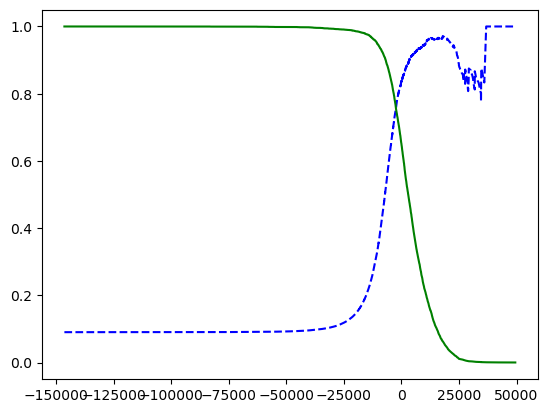

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 [...] # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

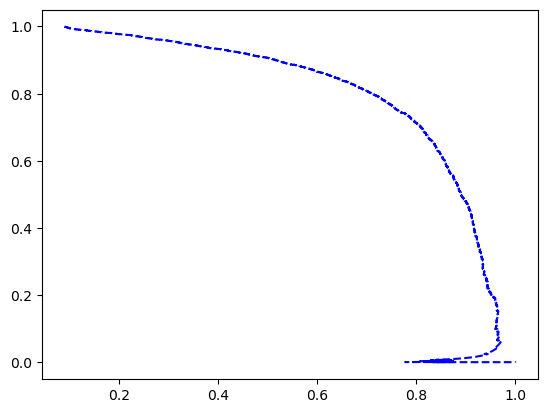

In [21]:
plt.plot(precisions,recalls,"b--")
X_lebel="recall"
plt.show()

In [22]:
import numpy as np
thresold_90_precision=thresholds[np.argmax(precisions>=0.80)]


In [23]:

thresold_90_precision

-1328.4125766562408

In [24]:
y_train_pred_90=(y_scores>=thresold_90_precision)

In [25]:
precision_score(y_train_5,y_train_pred_90)

0.8

In [26]:
recall_score(y_train_5, y_train_pred_90)

0.7127836192584394

In [27]:
from sklearn.metrics import roc_curve
fpr ,tpr ,thresolds =roc_curve(y_train_5,y_scores)


In [30]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")

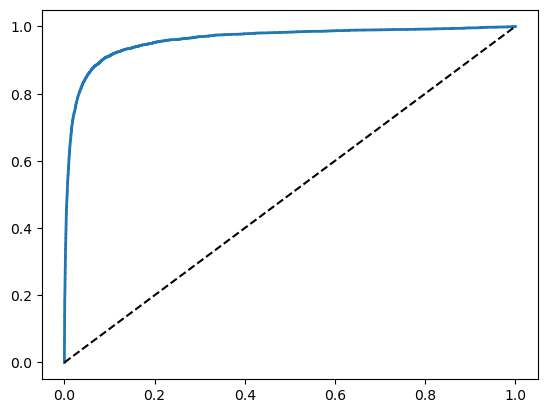

In [31]:
plot_roc_curve(fpr,tpr)
plt.show()